In [73]:
import json
def getPlotData(fileName, mixed_type):
    with open(fileName, 'r') as file:
        data_all_a = json.load(file)

    y_x_a = []
    if mixed_type==0:
        for data in data_all_a:
            total = float(data["Packets"]["Unconfirmed"])
            success = float(data["Packets"]["UnconfirmedSuccess"])
            if total>0:
                d = (success/total,total/float(data["SimTime"]))
                y_x_a.append(d)
    elif mixed_type==1:
        for data in data_all_a:
            total = float(data["Packets"]["Confirmed"])
            success = float(data["Packets"]["ConfirmedSuccess"])
            if total>0:
                d = (success/total,total/float(data["SimTime"]))
                y_x_a.append(d)
    elif mixed_type==2:
        for data in data_all_a:
            total = float(data["CPSR"]["Total"])
            success = float(data["CPSR"]["Success"])
            if total>0:
                d = (success/total,total/float(data["SimTime"]))
                print(d)
                y_x_a.append(d)
    else:
        for data in data_all_a:
            d = (float(data["ULPDR"]["Success"])/float(data["ULPDR"]["Total"]),float(data["ULPDR"]["Total"])/float(data["SimTime"]))
            y_x_a.append(d)

    y_x_a.sort(key=lambda x: x[1])

    y = [d[0] for d in y_x_a]
    x = [d[1] for d in y_x_a]
    return x,y

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

def filter_data(x,y, lthreshold, hthreshold):
    data = pd.DataFrame({'x': x, 'y': y})

    z_scores = np.abs(zscore(data['y']))
    filtered_data = data[(z_scores > lthreshold) & (z_scores < hthreshold)]
    return filtered_data

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_plot(fileNamex, labelx, mixed_type, window_size, line_style, marker_style):
    x,y = getPlotData(fileNamex, mixed_type)
    # filtered = filter_data(x, y, 0.25, 9.0)

    # x= filtered['x']
    # y= filtered['y']


    plt.xscale('log')

    df = pd.DataFrame({"X Values": x, "Y Values": y})
    df["Moving Average"] = df["Y Values"].rolling(window=window_size).mean()

    plt.plot(df["X Values"], df["Moving Average"], label=f'{labelx}', linestyle=line_style, marker=marker_style, color='black', markerfacecolor='None')

    plt.legend()
    # plt.tight_layout()
    plt.xlim([0.01,2])
    plt.ylim([0.8,1.0])

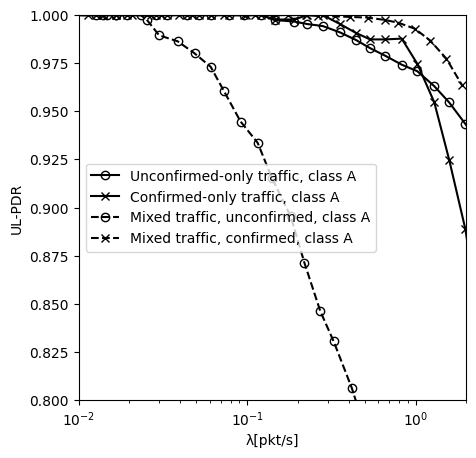

In [76]:
create_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_A', 'Unconfirmed-only traffic, class A',-1,9,'-','o')

create_plot('sim_results_scenario_1_8/ULPDR_CONFIRMED_A', 'Confirmed-only traffic, class A',-1,2,'-','x')
create_plot('sim_results_scenario_1_8/ULPDR_MIXED_A', 'Mixed traffic, unconfirmed, class A',0,11,'--','o')
create_plot('sim_results_scenario_1_8/ULPDR_MIXED_A', 'Mixed traffic, confirmed, class A',1,11,'--','x')


f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('UL-PDR')
plt.xlabel('λ[pkt/s]')
plt.show()

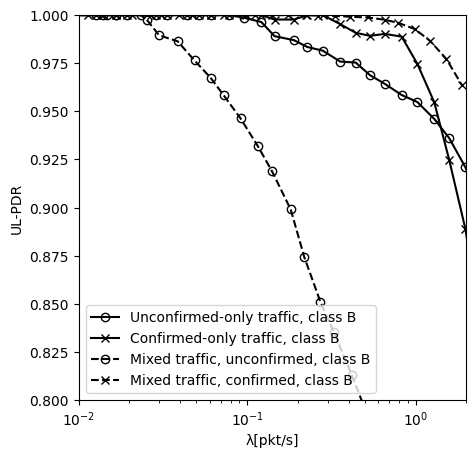

In [77]:
create_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_B', 'Unconfirmed-only traffic, class B',-1,5,'-','o')

create_plot('sim_results_scenario_1_8/ULPDR_CONFIRMED_B', 'Confirmed-only traffic, class B',-1,2,'-','x')
create_plot('sim_results_scenario_1_8/ULPDR_MIXED_B', 'Mixed traffic, unconfirmed, class B',0,11,'--','o')
create_plot('sim_results_scenario_1_8/ULPDR_MIXED_B', 'Mixed traffic, confirmed, class B',1,11,'--','x')


f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('UL-PDR')
plt.xlabel('λ[pkt/s]')
plt.show()

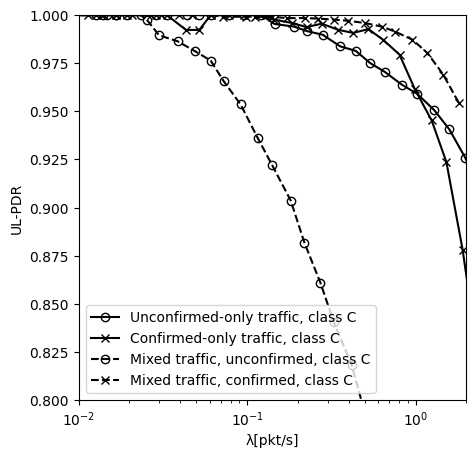

In [78]:
create_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_C', 'Unconfirmed-only traffic, class C',-1,5,'-','o')

create_plot('sim_results_scenario_1_8/ULPDR_CONFIRMED_C', 'Confirmed-only traffic, class C',-1,2,'-','x')
create_plot('sim_results_scenario_1_8/ULPDR_MIXED_C', 'Mixed traffic, unconfirmed, class C',0,11,'--','o')
create_plot('sim_results_scenario_1_8/ULPDR_MIXED_C', 'Mixed traffic, confirmed, class C',1,11,'--','x')


f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('UL-PDR')
plt.xlabel('λ[pkt/s]')
plt.show()

(1.0, 0.0013333333333333333)
(1.0, 0.0013333333333333333)
(1.0, 0.002)
(1.0, 0.002)
(1.0, 0.002)
(1.0, 0.0026666666666666666)
(1.0, 0.0033333333333333335)
(1.0, 0.004666666666666667)
(1.0, 0.004)
(1.0, 0.005333333333333333)
(1.0, 0.008666666666666666)
(1.0, 0.009333333333333334)
(1.0, 0.012666666666666666)
(1.0, 0.014)
(1.0, 0.016666666666666666)
(1.0, 0.019333333333333334)
(1.0, 0.028666666666666667)
(1.0, 0.03333333333333333)
(1.0, 0.044)
(1.0, 0.052)
(1.0, 0.06066666666666667)
(0.9914529914529915, 0.078)
(0.9791666666666666, 0.096)
(0.9065934065934066, 0.12133333333333333)
(0.8165137614678899, 0.14533333333333334)
(0.7368421052631579, 0.19)
(0.6598240469208211, 0.22733333333333333)
(0.5995260663507109, 0.2813333333333333)
(0.49906542056074765, 0.3566666666666667)
(0.43202416918429004, 0.44133333333333336)
(0.3527950310559006, 0.5366666666666666)
(0.3083923154701719, 0.6593333333333333)
(0.25302175664786464, 0.8273333333333334)
(0.21042345276872965, 1.0233333333333334)
(0.16787190082

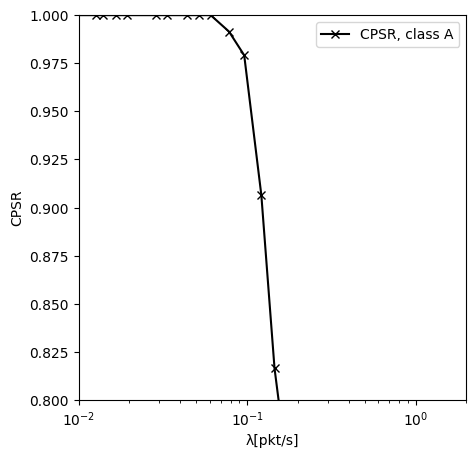

(1.0, 0.0013333333333333333)
(1.0, 0.0013333333333333333)
(1.0, 0.002)
(1.0, 0.002)
(1.0, 0.002)
(1.0, 0.0026666666666666666)
(1.0, 0.0033333333333333335)
(1.0, 0.004666666666666667)
(1.0, 0.004)
(1.0, 0.005333333333333333)
(1.0, 0.008666666666666666)
(1.0, 0.009333333333333334)
(1.0, 0.012666666666666666)
(1.0, 0.014)
(1.0, 0.016666666666666666)
(1.0, 0.019333333333333334)
(1.0, 0.028666666666666667)
(1.0, 0.03333333333333333)
(1.0, 0.044)
(1.0, 0.052)
(1.0, 0.06066666666666667)
(0.9914529914529915, 0.078)
(0.9930555555555556, 0.096)
(0.8736263736263736, 0.12133333333333333)
(0.8256880733944955, 0.14533333333333334)
(0.7368421052631579, 0.19)
(0.6598240469208211, 0.22733333333333333)
(0.5924170616113744, 0.2813333333333333)
(0.4952919020715631, 0.354)
(0.43051359516616317, 0.44133333333333336)
(0.3653366583541147, 0.5346666666666666)
(0.305668016194332, 0.6586666666666666)
(0.2532258064516129, 0.8266666666666667)
(0.21107491856677524, 1.0233333333333334)
(0.1683884297520661, 1.2906666

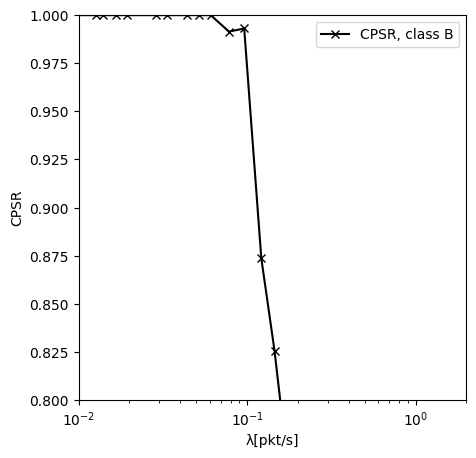

(1.0, 0.0013333333333333333)
(1.0, 0.0013333333333333333)
(1.0, 0.002)
(1.0, 0.002)
(1.0, 0.002)
(1.0, 0.0026666666666666666)
(1.0, 0.0033333333333333335)
(1.0, 0.004666666666666667)
(1.0, 0.004)
(1.0, 0.005333333333333333)
(1.0, 0.008666666666666666)
(1.0, 0.009333333333333334)
(1.0, 0.012666666666666666)
(1.0, 0.013333333333333334)
(1.0, 0.016666666666666666)
(1.0, 0.019333333333333334)
(0.9512195121951219, 0.027333333333333334)
(1.0, 0.03333333333333333)
(0.9365079365079365, 0.042)
(0.9459459459459459, 0.04933333333333333)
(0.9111111111111111, 0.06)
(0.9051724137931034, 0.07733333333333334)
(0.8928571428571429, 0.09333333333333334)
(0.8491620111731844, 0.11933333333333333)
(0.7327188940092166, 0.14466666666666667)
(0.6762589928057554, 0.18533333333333332)
(0.5769230769230769, 0.22533333333333333)
(0.5072815533980582, 0.27466666666666667)
(0.40384615384615385, 0.3466666666666667)
(0.3333333333333333, 0.426)
(0.2909783989834816, 0.5246666666666666)
(0.24612202688728024, 0.644666666666

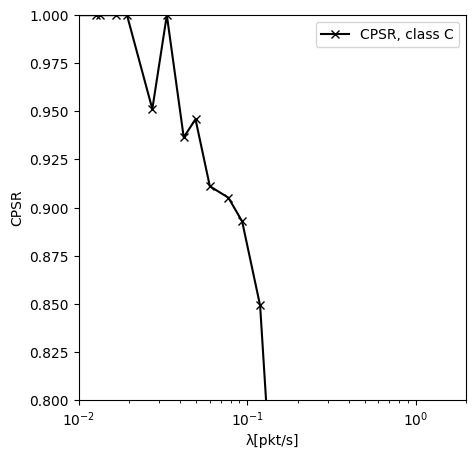

In [79]:
create_plot('sim_results_scenario_1_8/ULPDR_CONFIRMED_A', 'CPSR, class A',2,1,'-','x')

f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('CPSR')
plt.xlabel('λ[pkt/s]')
plt.show()

create_plot('sim_results_scenario_1_8/ULPDR_CONFIRMED_B', 'CPSR, class B',2,1,'-','x')

f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('CPSR')
plt.xlabel('λ[pkt/s]')
plt.show()

create_plot('sim_results_scenario_1_8/ULPDR_CONFIRMED_C', 'CPSR, class C',2,1,'-','x')

f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('CPSR')
plt.xlabel('λ[pkt/s]')
plt.show()

In [80]:
import json
import matplotlib.pyplot as plt
def get_bar_plot_data(fileName):
    with open(fileName, 'r') as file:
        data_all_a = json.load(file)
        s_count=0
        u_count=0
        i_count=0
        r_count=0
        t_count=0
        for data in data_all_a:
            s_count += float(data['Metrics']['S'])
            u_count += float(data['Metrics']['U'])
            i_count += float(data['Metrics']['I'])
            r_count += float(data['Metrics']['R'])
            t_count += float(data['Metrics']['T'])
        total = u_count+i_count+r_count+t_count
        y = [(u_count/total), (i_count/total), (r_count/total), (t_count/total)]
        
        return y
        

In [81]:
import matplotlib.pyplot as plt

def generate_bar_plot(unc_file1, cn_file2, device_class):
    x = ['U', 'I', 'R', 'T']
    ulpdr_unconfirmed = get_bar_plot_data(unc_file1)
    ulpdr_confirmed = get_bar_plot_data(cn_file2)

    plt.figure(figsize=(10, 5))

    bar_width = 0.9

    bar_positions_set1= [2,6,10,14]
    bar_positions_set2= [3,7,11,15]

    plt.bar(bar_positions_set1, ulpdr_unconfirmed, width=bar_width, label='Unconfirmed', color='white', edgecolor='black', hatch='\\')
    plt.bar(bar_positions_set2, ulpdr_confirmed, width=bar_width, label='confirmed', color='white',edgecolor='black', hatch='.')

    # Add labels to the axes
    plt.ylabel('Fraction of lost packets (%)')
    plt.title(f'Class {device_class}')

    xtick_positions = [2.5, 6.5, 10.5, 14.5] 
    plt.xticks(xtick_positions, x)

    plt.legend()
    plt.ylim([0.0,1.0])
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

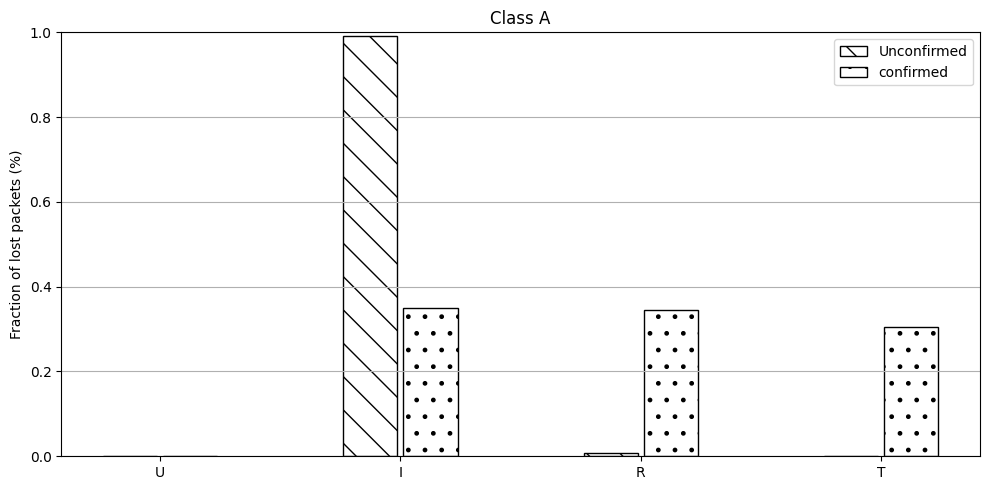

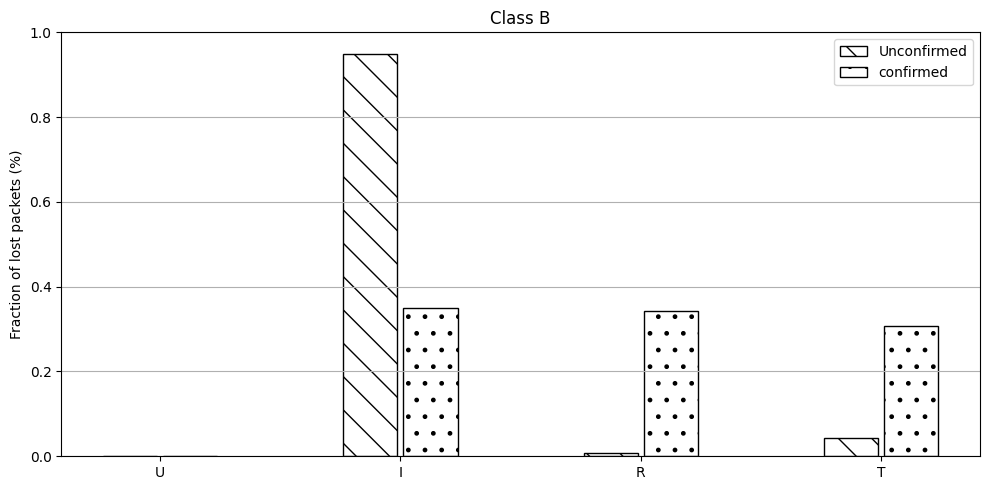

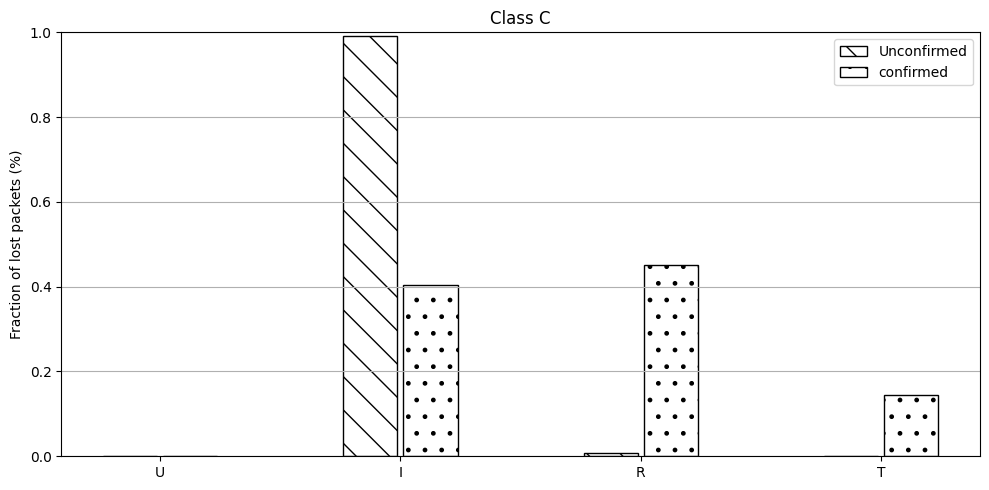

In [82]:
generate_bar_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_A', 'sim_results_scenario_1_4/ULPDR_CONFIRMED_A', 'A')
generate_bar_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_B', 'sim_results_scenario_1_4/ULPDR_CONFIRMED_B', 'B')
generate_bar_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_C', 'sim_results_scenario_1_4/ULPDR_CONFIRMED_C', 'C')

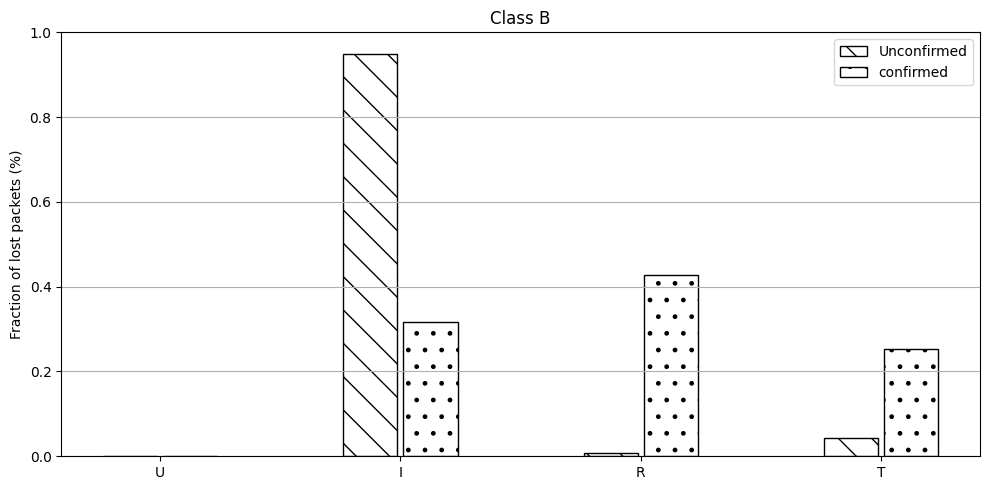

In [83]:

generate_bar_plot('sim_results_scenario_1_8/ULPDR_UNCONFIRMED_B', 'sim_results_scenario_1_3/ULPDR_CONFIRMED_B', 'B')